In [1]:
import os, sys
import time
import numpy as np

from qcodes import initialise_or_create_database_at
import proplot as pplt
import xarray as xr

In [2]:
import output_dataset.output_dataset as qp

## General Proplot Settings

In [3]:
## All the automatic plotting in principle builds on proplot. 
## General settings can be configures via the proplot.rc settings
## Settings specific to the auto_plot functions are highlighted below
pplt.rc['subplots.outerpad'] = 0.1
pplt.rc['subplots.innerpad'] = 0.0
pplt.rc['font.small'] = 7
pplt.rc['tick.labelsize'] = 7

## Load database

In [4]:
db_init = initialise_or_create_database_at('tutorial_data.db')

# Auto Plotting

<b> Main Functionality </b>

Below example shows the main functioning of the package, starting from simple examples. 

The following examples are shown:
- Auto-plot all variables in a dataset
- Auto-plot specific variables in a dataset
- Relable en rescale parameters
- Auto-plot multiple variables and multiple datasets
- Tuning the auto-plot configuration

<b> Example 1 - Loading and plotting a dataset</b>

Gets all variables of dataset 1 and automatically plot them

Upon running for the first time, this will extract all newly encountered variables and store them, so they can be updated later.

Plot = True is shown here explicitly, but will be True by default.


The extracted dataset will be accessible in the output via output['datasets']

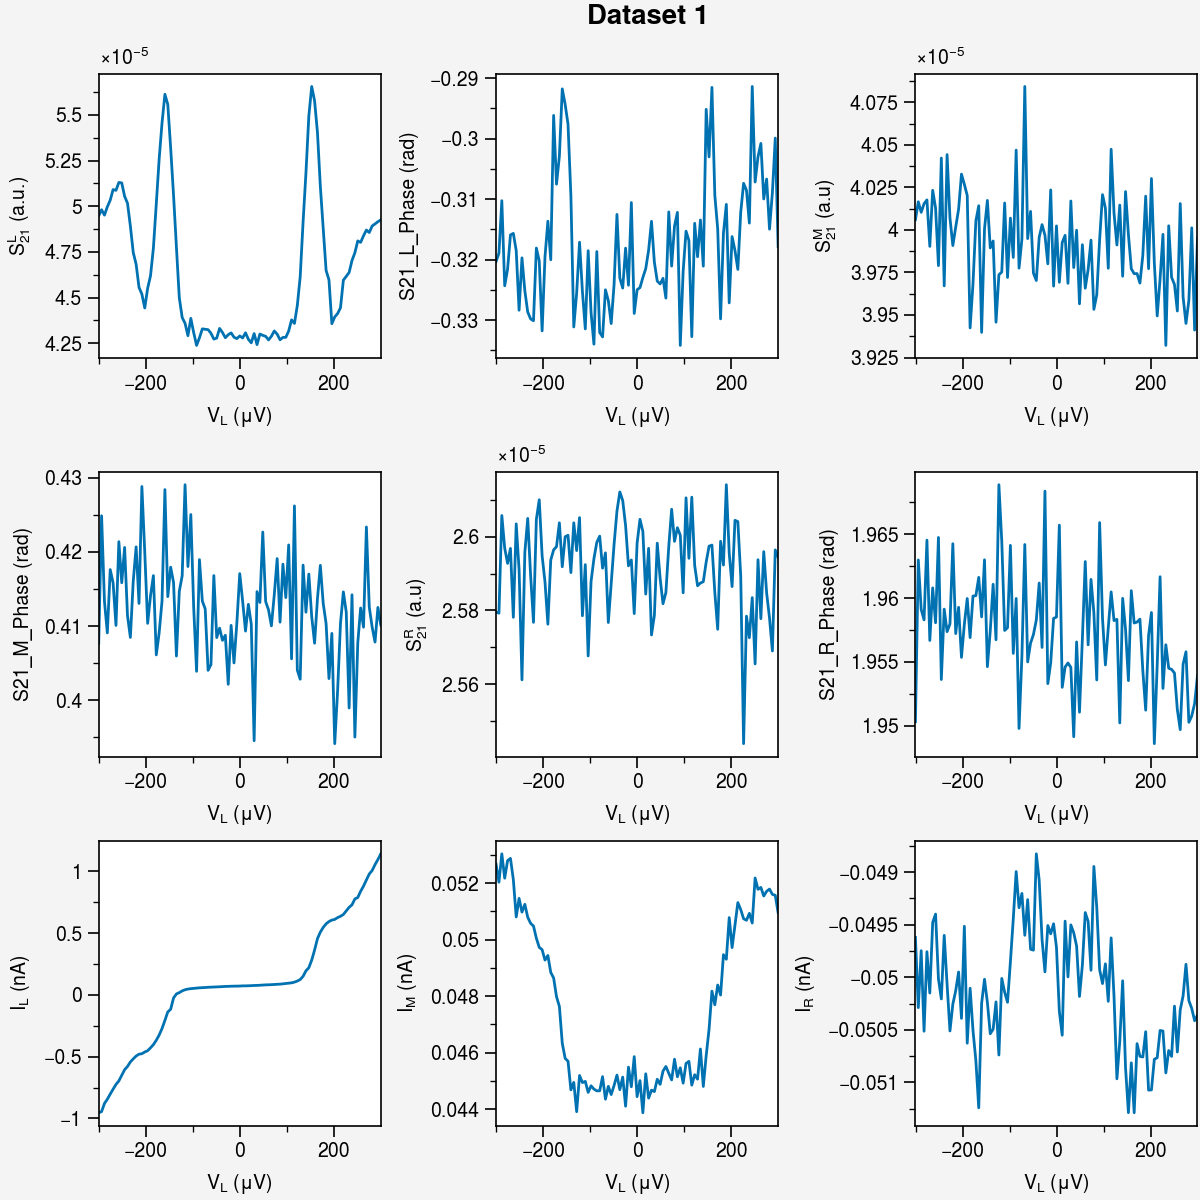

In [5]:
output = qp.output_dataset([1])

## Formatting parameters

<b>Example 2 - Reformatting variabels</b>

 Let's focus on a single variable: let's work with meas_current_K1
 
 Firs, we want to update all parameters to be in desired units and have nice names.

 This is done by calling the update_parameter function
 
 Each parameter has stored:
 
 -  A verbose_name: the name to be shown in figure axis. Proplot supports LaTeX notation
 -  A scale: a multiplication factors that will be applied.
 -  A unit: the new unit to be added to the axis labels.

To interact with parameter dict there are the following function:

- update_parameter: updates the parameter
- list_parameters: show all stored parameters
- parameter_info: show stored info for a specific parameter
- display_parameter_info: show stored info for a specific parameter in markdown
- construct_label: return the label for a parameter as string (returns verbose_name + unit[optional])

In [6]:
## Updating the parameter settings
qp.update_parameter('meas_current_K1', verbose_name = '$I_{\mathrm{L}}$', scale = 1e9, unit = 'nA')
qp.update_parameter('v_bias_L', verbose_name = '$V_{\mathrm{L}}$', scale = 1e6, unit = '$\mu$V')

Updating known parameter: meas_current_K1
Updating known parameter: v_bias_L


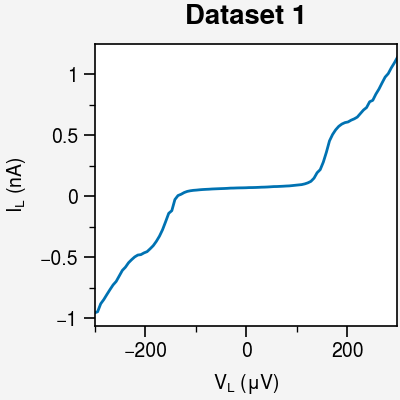

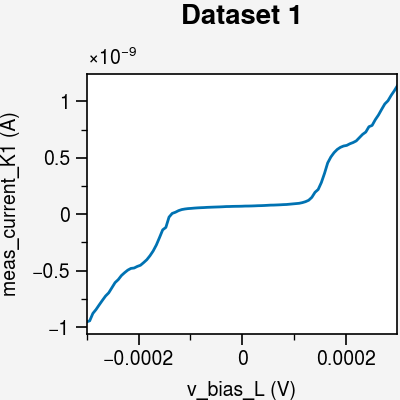

In [7]:
## Plotting with reformatted labels and scales
## This time, we output only the parameter that we want by passing the desired data_keys
## The data_keys must be the variable names as stored in QCoDeS, not the verbose names
## Note: this must be a nested list even when supplying only a single dataset
output = qp.output_dataset([1],data_keys = [['meas_current_K1']])

## The reformatting can be turned off if desired
output = qp.output_dataset([1],data_keys = [['meas_current_K1']], reformat = False)


Updating known parameter: S21_L_Amplitude


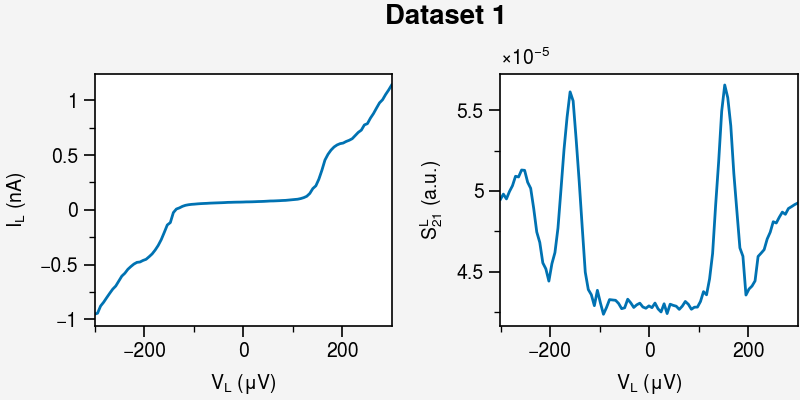

In [8]:
## We can do this for all parameters and in principle only have to do this once
## Adding now for example also the S21_Amplitude plot
qp.update_parameter('S21_L_Amplitude', verbose_name = '$S_{21}^{L}$', scale = 1, unit = 'a.u.')

## By passing multiple variables in the data_keys list, both will be extracted
output = qp.output_dataset([1],data_keys = [['meas_current_K1', 'S21_L_Amplitude']])


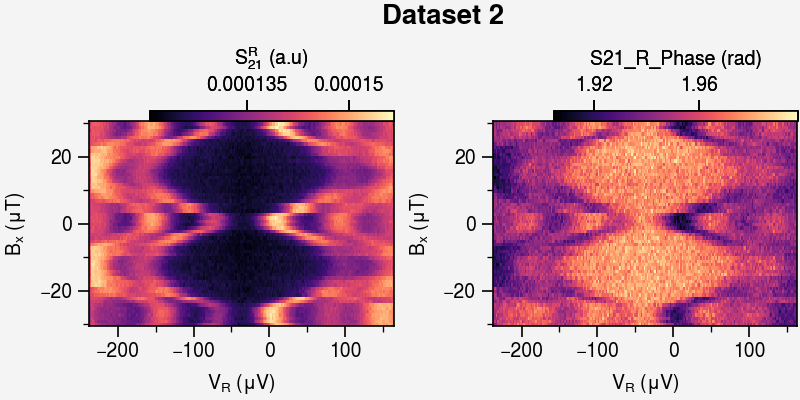

In [9]:
output = qp.output_dataset([2])

In [10]:
## To see the saved settings for a specific parameter
qp.display_parameter_info('meas_current_K1')

Name: $I_{\mathrm{L}}$

Scale: 1000000000.0

Unit: nA

In [11]:
## To see the parameters that have been stored
qp.list_parameters()

ABS1 ($V_{\mathrm{ABS}}^{1}$)

QD1P ($V_{\mathrm{QDL}}$)

G_LL ($G_{\mathrm{LL}}$)

G_MM ($G_{\mathrm{MM}}$)

G_RR ($G_{\mathrm{RR}}$)

meas_current_K1 ($I_{\mathrm{L}}$)

meas_current_K2 ($I_{\mathrm{M}}$)

meas_current_K3 ($I_{\mathrm{R}}$)

meas_current_Lockin1 (meas_current_Lockin1)

meas_current_Lockin2 (meas_current_Lockin2)

meas_current_Lockin3 (meas_current_Lockin3)

phase_L1 (phase_L1)

phase_L2 (phase_L2)

phase_L3 (phase_L3)

magnet_x_yoko ($B_{x}$)

QD2P ($V_{\mathrm{QDM}}$)

G_LM ($G_{\mathrm{LM}}$)

G_RM ($G_{\mathrm{RM}}$)

G_ML ($G_{\mathrm{MR}}$)

G_RL ($G_{\mathrm{RL}}$)

QD3P ($V_{\mathrm{QDR}}$)

v_bias_L ($V_{\mathrm{L}}$)

v_bias_M ($V_{M}$)

v_bias_R ($V_{R}$)

G_LR ($G_{\mathrm{LR}}$)

G_MR ($G_{\mathrm{MR}}$)

magnet_B_y ()

ABS2 ($V_{\mathrm{ABS}}^{2}$)

QD3R (V_{\mathrm{ABS}}^{1})

QD3L ()

QD1L ()

repetition_index (Repetition)

S21_L_Amplitude ($S_{21}^{L}$)

S21_M_Amplitude ($S^{M}_{21}$)

S21_R_Amplitude ($S^{R}_{21}$)

S21_L_Phase (S21_L_Phase)

S21_M_Phase (S21_M_Phase)

S21_R_Phase (S21_R_Phase)

bias ($V_{\mathrm{bias}}$)

phi ($\phi_{\Delta}$)

mu1 ($\mathrm{\mu}_{\mathrm{L}}$)

mu1mu2mu3 ($\mu_{\mathrm{L}}\mu_{\mathrm{M}}\mu_{\mathrm{R}}$)

tLtR ($t_1t_2$)

mu1mu2 ($\mu_{\mathrm{L}}\mu_{\mathrm{M}}$)

tL ($t_1$)

magnet_B_z ($B_z$)

t1 (t/$\Delta$)

t1t2 (t/$\Delta$)

## Outputting Multiple datasets

<b> Example 3 - Multiple datasets </b>

Most of the time one wants to output multiple datasets, or show different variables from different datasets next to each other

The output_dataset accepts a list of run_ids or DataSet objects and can extract different parameters from each. 

It handles the following scenarios:

- Passing a list of multiple run_ids -> output a figure for each run, containing all data_variables for each
- Passing a list of multiple run_ids and a list of multiple lists with data_vars (of equal length) -> output a figure for each, with the specified data_variables in each run
- Pass a list of multiple run_ids and a single list of data_vars: get the same data variables for each run_id

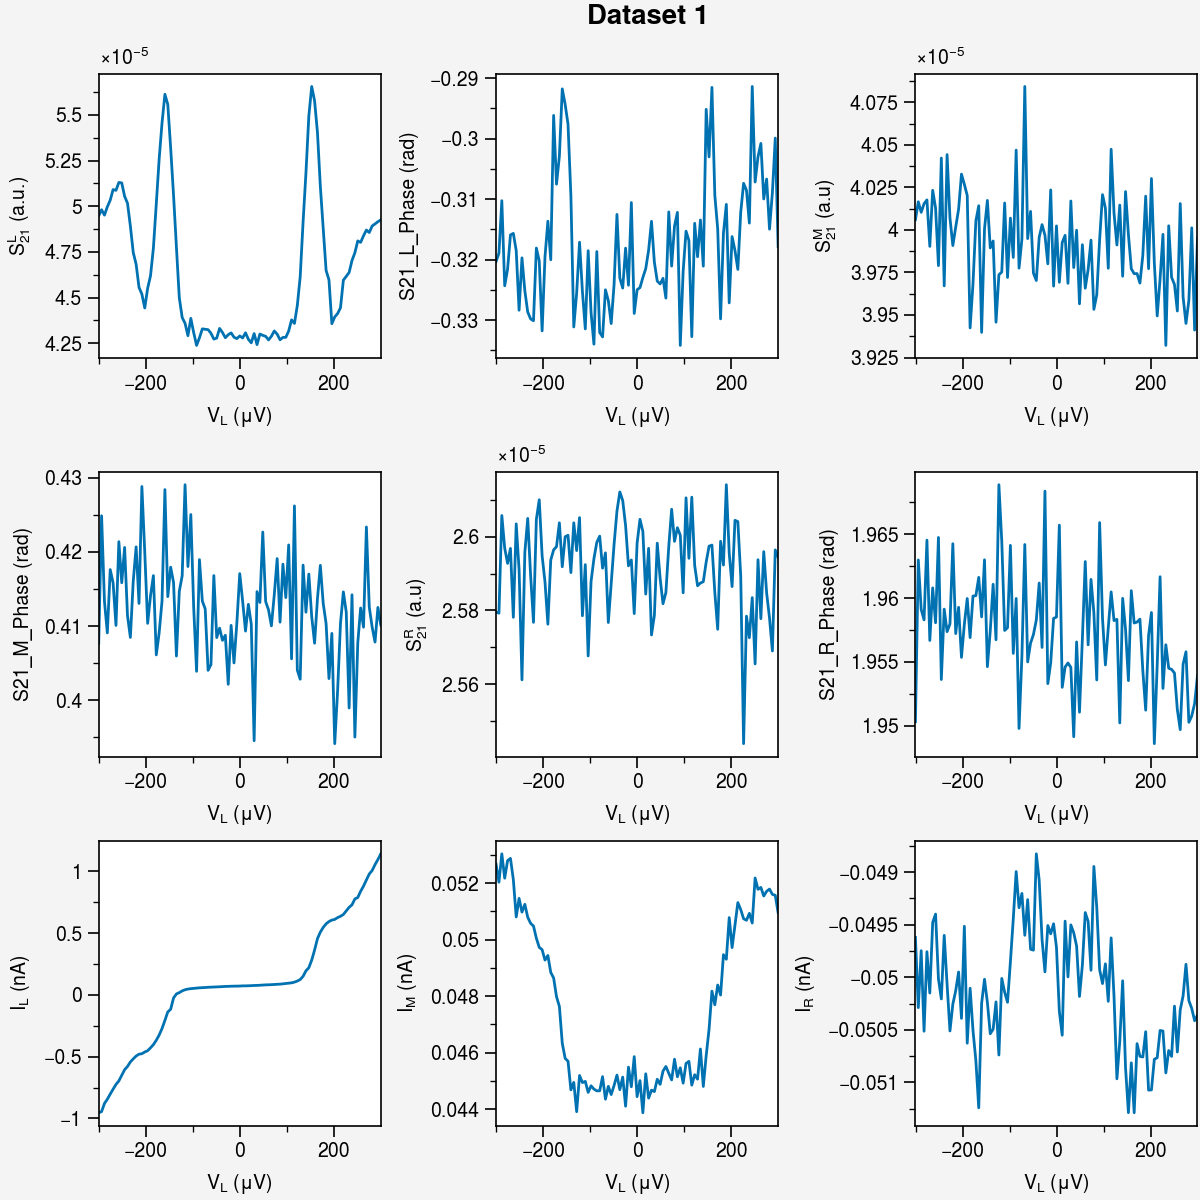

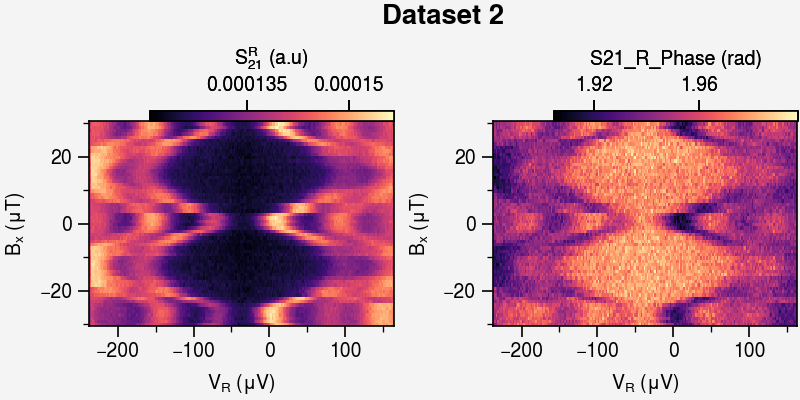

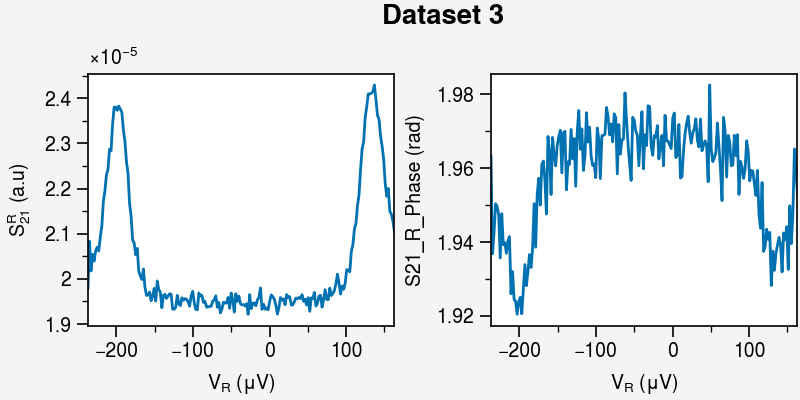

In [12]:
## Output datasets 1, 2, 3 and create a figure for each dataset
output = qp.output_dataset([1,2,3])

Adding new parameter: QD2B


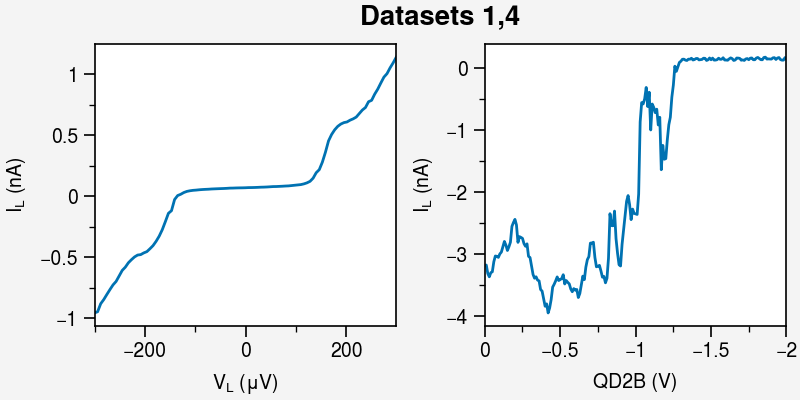

In [13]:
## Output datasets 1 and 4, and extract meas_current_K1 for each
## note: this creates just single figure
output = qp.output_dataset([1,4], data_keys = [['meas_current_K1']] )

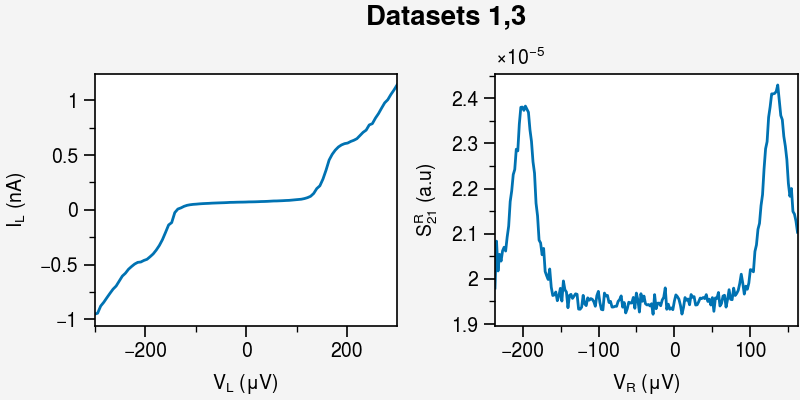

In [14]:
## Output datasets 1 and 3, 
## Extract meas_current_K1 for dataset 1, and S21_R_Amplitude for dataset 3
## note: this again creates just single figure. Multiple figures are only created when on of the datasets has more than 1 variable
output = qp.output_dataset([1,3], data_keys = [['meas_current_K1'], ['S21_R_Amplitude']])

## Configuring auto plot settings

<b> Example 4 - Updating auto plot settings </p>

The auto plotting currently has a few default parameters stored and assumes 4 subsections. This can be extended later

- figs: general figure settings such as max number of columns, width/height per column and whether to add colorbars or titles
- 2D: all settings here will be passed to plt.colormesh()
- 1D: all settings placed here will be passed to plt.plot()
- Colorbar: all settings here will be passed to ax.colorbar()

In [15]:
## The config file can be seen by calling the dictionary. 
## Note: changing the dictionary directly will NOT save it
## Either update a single parameter via update_config functions
## Or pass an entire dictionary to save_config(<dict>) to change multiple settings at once
## If you pass a dictionary that does not contain the required default values, this will NOT raise an error but it WILL break the code
## (it could ofcourse absolutely raise an error but maybe later)
qp.configs

{'figs': {'max_cols': 3,
  'row_height': 2,
  'col_width': 2,
  'minorticks': 2,
  'majorticks': 2,
  'add_colorbars': True,
  'set_title': True},
 'colorbar': {'length': 0.8,
  'width': 0.05,
  'align': 'right',
  'location': 'top',
  'pad': -1,
  'ticklabelsize': 7},
 '2D': {'levels': 1000, 'cmap': 'magma'},
 '1D': {'linewidth': 1}}

Updating known setting
Updating known setting


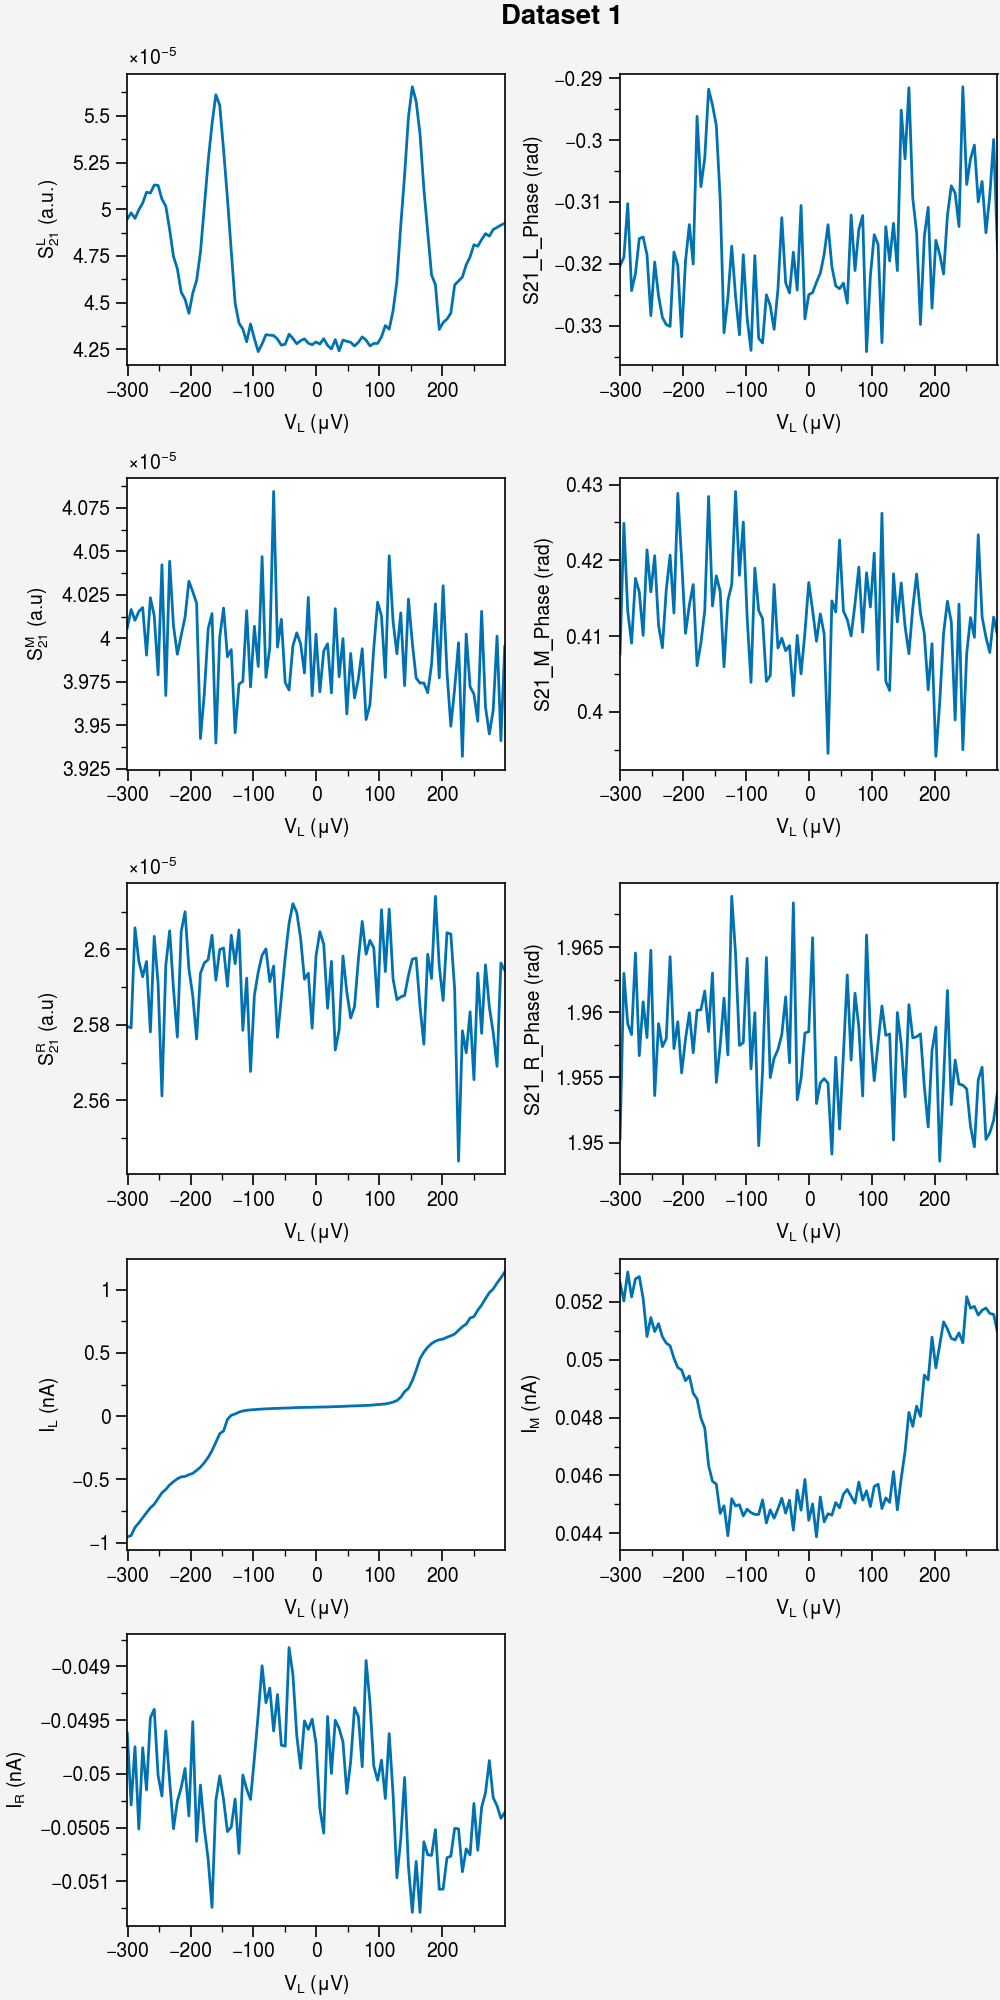

In [16]:
## Here for example, we set the max_cols to 2 and increase the column width to 2.5
qp.update_config('figs','max_cols',2)
qp.update_config('figs','col_width',2.5)
output = qp.output_dataset([1])

# Processing Data

In [17]:
import output_dataset.processing_functions as prf
from functools import partial

<b> Example 5 - adding data processing </b>

Often some operations need to be applied to data before plotting

A list of process_funcs can be passed along with the data

All datasets will be passed to the functions in this list. Every processing function must return a list of datasets for the code to function

A few default operations are supplied in process_functions file. If one wants to add and push new functions for this file: please only add very general operations that do not assume anything about the names or shape of the data. 

Current operations include (examples below):

- transpose: transposes the data using the xarray transpose function
- select_data: uses xarray.sel function to select a linetrace
- adjust_axis: changes the coordinate axis according to a supplied mapping



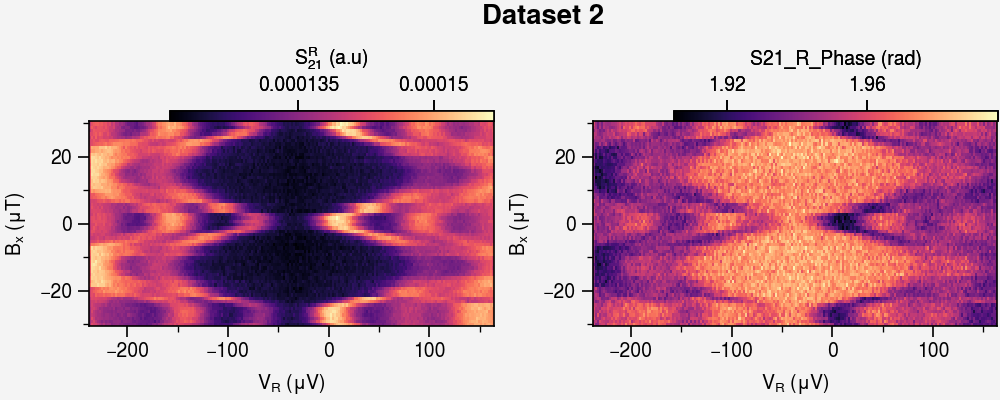

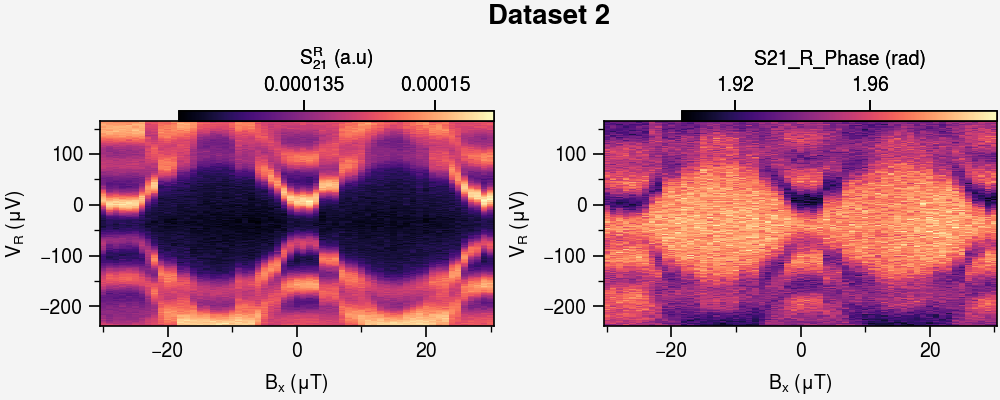

In [18]:
## Example: transposing the data

## Unprocessed data
qp.output_dataset([2])

process_funcs=  [prf.transpose]
## Processed data
output = qp.output_dataset([2], process_funcs = process_funcs)



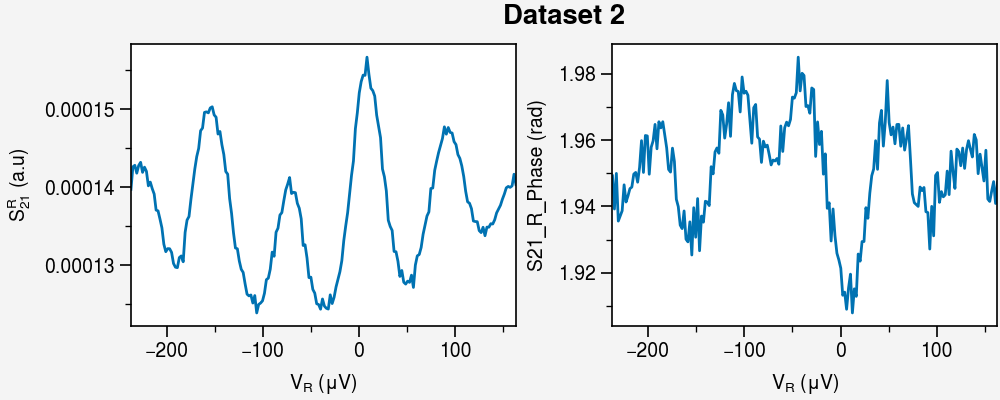

In [19]:
## Example: selecting a linetrace 

## A convenient way to pass variables along with a processing function is the use of the partial function from functools
## Below: selects a linetrace from dataset 2 at magnet_x_yoko = 2
process_funcs = [partial(prf.select_data, sel_dict = {'magnet_x_yoko':2})]

output = qp.output_dataset([2],[['S21_R_Amplitude', 'S21_R_Phase']], process_funcs = process_funcs)



In [20]:
qp.update_parameter('magnet_x_yoko', verbose_name = '$B_x$', scale = 1e6, unit = '$\mu$T')
qp.update_parameter('v_bias_R', verbose_name = '$V_{R}$', scale = 1e6, unit = '$\mu$V')

Updating known parameter: magnet_x_yoko
Updating known parameter: v_bias_R


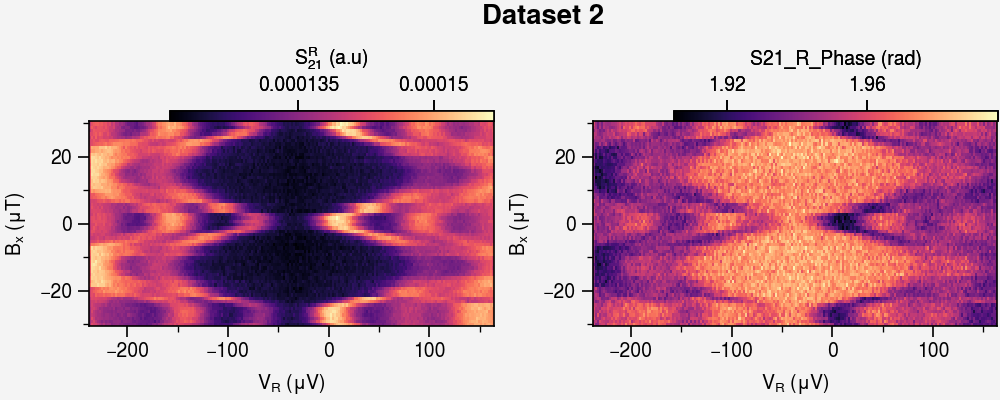

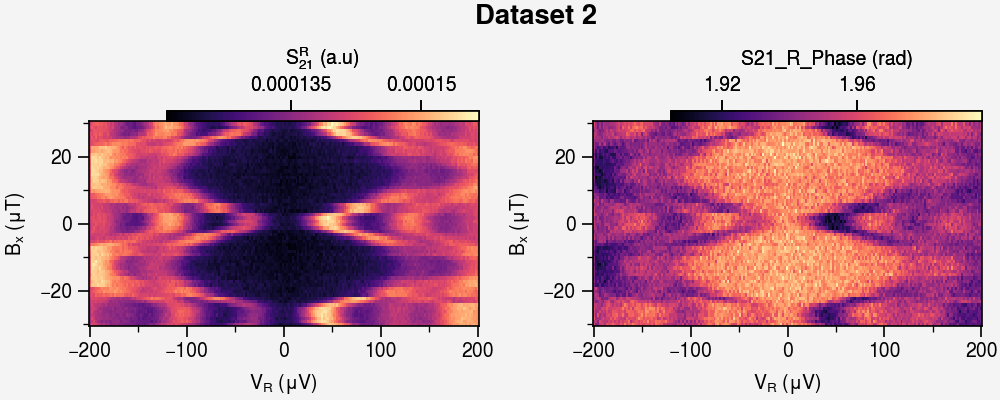

In [21]:
## Example: adjusting the axis to be centered around 0
## Unprocessed data
output = qp.output_dataset([2],[['S21_R_Amplitude', 'S21_R_Phase']])
## Processed data
process_funcs = [partial(prf.adjust_axis, mapping = prf.centre_axis, adjust = [0])]
output = qp.output_dataset([2],[['S21_R_Amplitude', 'S21_R_Phase']], process_funcs = process_funcs)


# Customized Plotting Functions

<b> Example 6 - Providing your own figure and plotting functions </b>

The above examples all use the automated plotting, which should be sufficient for quick plotting of raw data

For more advanced plotting and processing, either use plot=False and handle the outputted datasets yourself
or pass along your own custom plotting functions which will obtain the datasets within output_dataset

Below highlights an example of plotting the above data in the provided examplar plot_colormeshes and plot_lines function.

It gets as messy as you want in terms of passing arguments as such (the plot_functions to provide can be as specific or as general as you like)

In [22]:
from output_dataset.plotting_functions import plot_colormeshes, plot_lines

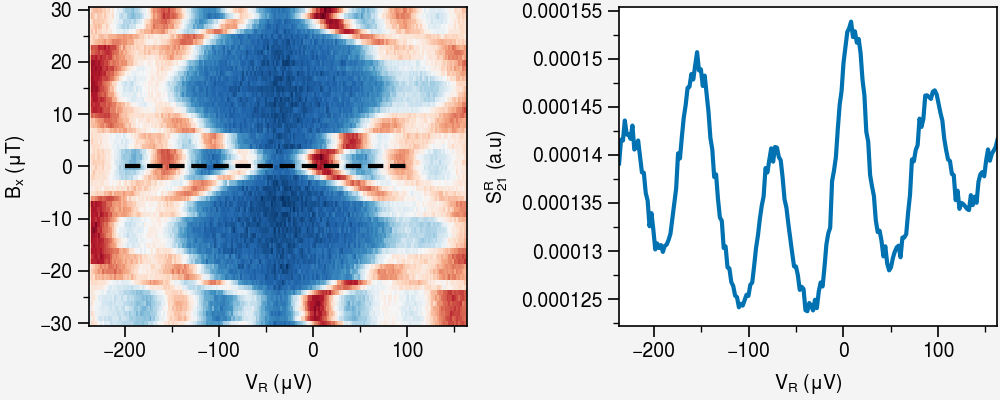

In [26]:
## Create figure and axis
fig, axs = pplt.subplots([1,2], figwidth = 5, figheight = 2, grid=  'off', sharex=False,sharey=False, pad =0.5)

## Settings dictionary for the colormesh
pmesh_dict ={
    'fig': fig,
    'axs':[axs[0]],
    'levels':500,
    'cmap':'RdBu_r',
    'lines': [[[-200,100],[0,0], {'c':'black', 'linestyle': 'dashed'}]]
}

## Create the plotting function and pass along the settings that are handled inside plot_colormeshes
plot_func = partial(plot_colormeshes, **pmesh_dict)
output = qp.output_dataset([2], [['S21_R_Amplitude']], plot_func = plot_func)

## Plot a linetrace next the 2D map
linetrace_dict = {
    'fig':fig,
    'axs':axs[1],
    'colors': ['C0'], ## specify the color of the linetrace,
}

## The plot_lines function expects a bunch of datasets with a single 1D linetrace in each
plot_func = partial(plot_lines, **linetrace_dict)
process_funcs = [partial(prf.select_data, sel_dict = {'magnet_x_yoko':0})]
output = qp.output_dataset([2], [['S21_R_Amplitude']], plot_func = plot_func, process_funcs = process_funcs)
